# Median House Sale Prices forecast in Litchfield

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('Litchfield.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,205326.17,287938.00,Litchfield
1,2001-02-01,193006.60,298960.24,Litchfield
2,2001-03-01,199242.44,294080.91,Litchfield
3,2001-04-01,212930.85,274440.40,Litchfield
4,2001-05-01,208368.04,294296.50,Litchfield


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,205326.17,287938.00
1,2001-02-01,193006.60,298960.24
2,2001-03-01,199242.44,294080.91
3,2001-04-01,212930.85,274440.40
4,2001-05-01,208368.04,294296.50


Extracting only Median Sale Price as a dataframe by removing Average Sale Price feature

In [34]:
median_data=data_frame.drop(['Average Sale Price'],axis=1)

## Forecasting median_data

In [35]:
median_data.head()

,Date,Median Sale Price
0,2001-01-01,205326.17
1,2001-02-01,193006.60
2,2001-03-01,199242.44
3,2001-04-01,212930.85
4,2001-05-01,208368.04


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
median_data.columns=['ds','y']

In [37]:
median_data

,ds,y
0,2001-01-01,205326.17
1,2001-02-01,193006.60
2,2001-03-01,199242.44
3,2001-04-01,212930.85
4,2001-05-01,208368.04
...,...,...
245,2021-06-01,247000.00
246,2021-07-01,265000.00
247,2021-08-01,260000.00
248,2021-09-01,252043.50


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(median_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,290024.355117,267059.170956,313886.373099
270,2023-06-30,273781.333566,251782.479360,296540.366468
271,2023-07-31,267935.291456,245867.750632,290453.115368
272,2023-08-31,264932.264270,241719.104286,287106.143203
273,2023-09-30,242499.380206,218969.562558,265130.479554


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,208085.995524,176896.274420,218786.312883,208085.995524,208085.995524,-10584.774404,-10584.774404,-10584.774404,-10584.774404,-10584.774404,-10584.774404,0.0,0.0,0.0,197501.221120
1,2001-02-01,209757.870658,165409.490048,208074.165108,209757.870658,209757.870658,-23517.186466,-23517.186466,-23517.186466,-23517.186466,-23517.186466,-23517.186466,0.0,0.0,0.0,186240.684192
2,2001-03-01,211267.951424,177403.667168,218687.285907,211267.951424,211267.951424,-13086.888228,-13086.888228,-13086.888228,-13086.888228,-13086.888228,-13086.888228,0.0,0.0,0.0,198181.063196
3,2001-04-01,212939.826558,182331.711637,228055.102401,212939.826558,212939.826558,-7518.934140,-7518.934140,-7518.934140,-7518.934140,-7518.934140,-7518.934140,0.0,0.0,0.0,205420.892418
4,2001-05-01,214557.770236,196673.562187,241264.332801,214557.770236,214557.770236,4264.751800,4264.751800,4264.751800,4264.751800,4264.751800,4264.751800,0.0,0.0,0.0,218822.522036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,259305.123961,267059.170956,313886.373099,253035.884715,264454.972099,30719.231156,30719.231156,30719.231156,30719.231156,30719.231156,30719.231156,0.0,0.0,0.0,290024.355117
270,2023-06-30,260075.287811,251782.479360,296540.366468,253334.577292,265611.852669,13706.045755,13706.045755,13706.045755,13706.045755,13706.045755,13706.045755,0.0,0.0,0.0,273781.333566
271,2023-07-31,260871.123790,245867.750632,290453.115368,253556.372502,266731.578088,7064.167666,7064.167666,7064.167666,7064.167666,7064.167666,7064.167666,0.0,0.0,0.0,267935.291456
272,2023-08-31,261666.959768,241719.104286,287106.143203,253637.482187,267901.005063,3265.304502,3265.304502,3265.304502,3265.304502,3265.304502,3265.304502,0.0,0.0,0.0,264932.264270


## Plotting the forecast data

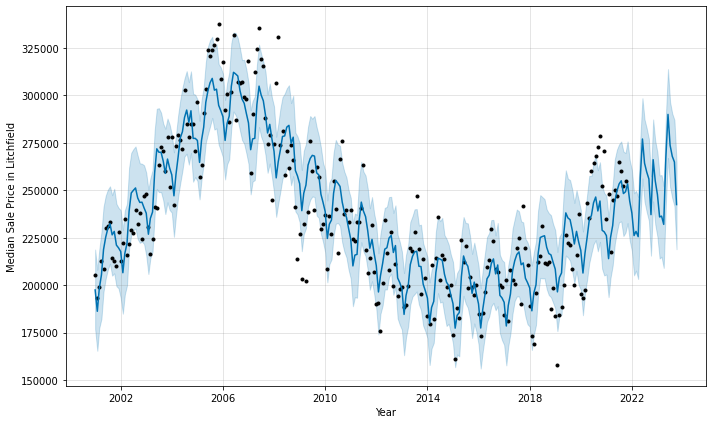

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

## Plotting components of forecast data

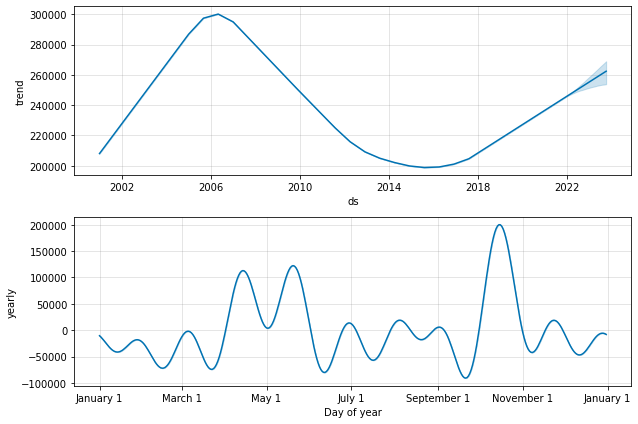

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Median Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,4.904880e+08,22146.963730,17790.224602,0.074598,0.067669,0.074519,0.613636
1,40 days,5.289795e+08,22999.553464,18703.629870,0.078292,0.073805,0.078539,0.613636
2,42 days,5.298279e+08,23017.990109,18825.404219,0.078915,0.073805,0.079151,0.613636
3,44 days,5.376940e+08,23188.229895,18971.840846,0.079908,0.075410,0.079757,0.613636
4,45 days,5.707664e+08,23890.718305,19749.330962,0.082943,0.077028,0.082703,0.590909


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.92540201886318%
Horizon: 40 days 00:00:00, Accuracy: 99.92170799996384%
Horizon: 42 days 00:00:00, Accuracy: 99.92108547246102%
Horizon: 44 days 00:00:00, Accuracy: 99.92009215833224%
Horizon: 45 days 00:00:00, Accuracy: 99.91705735227579%
Horizon: 46 days 00:00:00, Accuracy: 99.9176481892837%
Horizon: 47 days 00:00:00, Accuracy: 99.91825081761954%
Horizon: 49 days 00:00:00, Accuracy: 99.91532405853349%
Horizon: 50 days 00:00:00, Accuracy: 99.91815433295787%
Horizon: 51 days 00:00:00, Accuracy: 99.91787951996398%
Horizon: 52 days 00:00:00, Accuracy: 99.91735463156455%
Horizon: 54 days 00:00:00, Accuracy: 99.91572112908302%
Horizon: 55 days 00:00:00, Accuracy: 99.91197438399665%
Horizon: 56 days 00:00:00, Accuracy: 99.90180699435827%
Horizon: 58 days 00:00:00, Accuracy: 99.89851237751776%
Horizon: 60 days 00:00:00, Accuracy: 99.89939522657616%
Horizon: 61 days 00:00:00, Accuracy: 99.8997141265687%
Horizon: 62 days 00:00:00, Accuracy: 99.9052840190

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

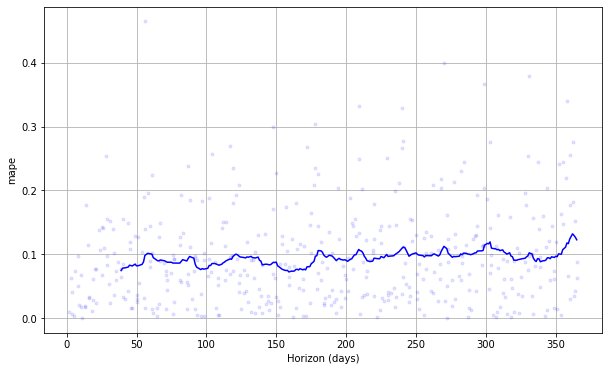

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 80-90.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_median_sale_price.pkl','wb') as file:
    pickle.dump(m,file)